In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-09-13 21:53:23,406 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/artemis/readout/2016-09-13_154041_2_dB_dac.nc')

In [4]:
sa = ncf.StreamArray1

In [49]:
s0 = sa.stream(2)

In [43]:
s0.s21_raw.shape

(1048576,)

In [35]:
from kid_readout.analysis.timedomain.filters import lpf

In [50]:
ls0 = lpf(s0.s21_raw,num_taps=1024,cutoff=122,nyquist_freq=s0.stream_sample_rate,decimate_by=128)

(-50, 50)

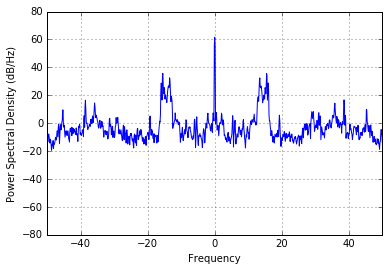

In [64]:
_=psd(ls0,Fs=s0.stream_sample_rate/128,NFFT=2048)
xlim(-50,50)

(-20, 20)

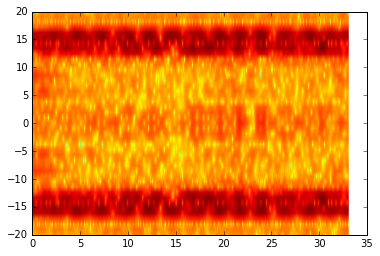

In [59]:
_=specgram(ls0-ls0.mean(),Fs=s0.stream_sample_rate/128,NFFT=256,noverlap=255)
ylim(-20,20)

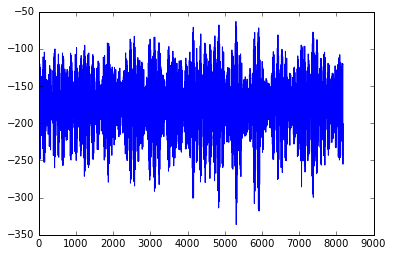

In [66]:
plot(ls0.imag)

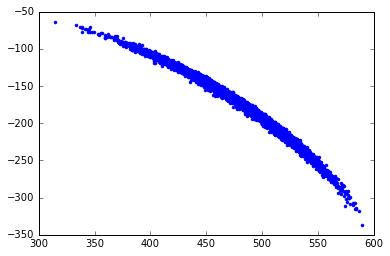

In [54]:
plot_ri(ls0,'.')